In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from plotly import graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import pandas as pd
import math
from Analyse import Analyse

# 

# from matplotlib.pyplot import figure
# figure(figsize=(8, 6), dpi=80)b

plt.rcParams["figure.figsize"] = (25,10)

In [2]:
# want a class that just has to load the data-set once

# can exclude certain columns of data if need be

# can create different plots if need be

# have to create dynamic visualisations if needed 

# think about how it could be made efficient based on the loading time

# think of some plots to compare more than one variables (maybe against each other)


# class used to not load the data everytime you want a plot
# class Analyse:
    
#     # constructor to create and load the data
#     def __init__(self, path):
        
#     # get a dictionary that has all the characteristics given to the individual runs
#     def get_characteristics(self):
        
#     # reduce the array to fit static visualisation
#     def get_all_lanes_data(self):
        
#     # compress the array
#     def get_array(self, data):
        
#     # plot a line plot with legends being the variable name given
#     def plot_line_plot(self, variable):
        
#     # get an array of titles 
#     def get_titles(self, target):
        
        

In [3]:
class Analyse:
    
    def __init__(self, path):

        # read in the data
        self.data = pd.read_csv(path, low_memory=False)
        
        # get the number of columns which are the number of runs done for analysis
        self.cols = self.data.shape[1] - 1
        
        # get a dictionary of all the characteristics avaiables (basically they are all variables)
        self.characteristics = self.get_characteristics()
        
        # get the formatted version that could be used to plot the data
        self.lane_data_temp = self.get_all_lanes_data()
        
        # array for the number of turns (right now the only variable for testing)
        self.turns = []
    
    # function to return the values (characteristics) in a fom of dictionary
    def get_characteristics(self):
        
        # dictionary to store all the values
        values = {}
        
        # for loop to loop to those variables
        for col in range(self.cols):
            temp = {}
            
            key_data = self.data["[run number]"][:5]
            temp_data = self.data[str(col+1)][:5]
            
            for key in range(5):
                temp[key_data[key]] = temp_data[key]
                
            values[col+1] = temp
        
        return values
    
    # function to get all the lanes data in a plottable format
    def get_all_lanes_data(self):
        
        # empty array that is to be returned
        values = []
        
        # for loop to get all the values
        for col in range(self.cols):
            
            # send in the data for the corresponding column
            temp_arr = self.get_array(self.data[str(col+1)][10:])
            values.append(temp_arr)
        
        return values
    
    # function to get a single array in the required version
    def get_array(self, data):
        
        # empty array which is to be returned
        array = []
        
        for val in data: 
            array.append(val)
            
        # get all the values that are not nan (refactor this part if you get time in future)
        for i in range(len(array)-1, -1, -1):
            
            if not math.isnan(array[i]):
                array = array[:i+1]
                break
        
        # return the array after passing the array to a diffrent function
        return self.get_lane_change_array(array)
        
    # function to get an array of the tick when a turn took place
    def get_lane_change_array(self, array):
        
        # empty array
        res = [0]
        curr = 0
        
        for idx, val in enumerate(array):
            if curr != val:
                curr = val
                res.append(idx)
        
        return res
    
    # function to generate a line plot for now
    def plot_line_plot(self, variable):
        
        titles = self.get_titles(variable)
        
        for idx, column in enumerate(self.lane_data_temp):
            
            self.turns = [i for i in range(len(column))]
            plt.plot(column, self.turns, label = str(titles[idx]))
        
        plt.xlim(left=0)
        plt.ylim(bottom=0)
        plt.xlabel(variable, fontsize=28)
        plt.ylabel("No. of Turns", fontsize=28)
        plt.savefig(variable + ".png")
        plt.legend()
        plt.show()
        
    
        
    # function to get the variable values as titles
    def get_titles(self, target):
        
        res = []
        
        for _, values in self.characteristics.items():
            res.append(values[target])
        
        return res


In [4]:
# get a dictionary that has all the characteristics given to the individual runs

# return an object of class Analyse that also provides a line plot
def generate_plot(path, variable):
    
    obj = Analyse(path)
    obj.plot_line_plot(variable)
    
    return obj

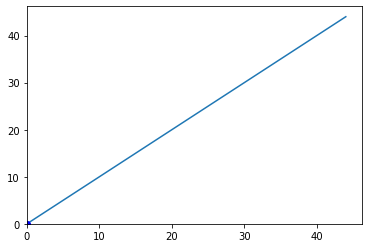

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

a = np.array([0])
#var1adj = np.append(a,var1)
f, ax = plt.subplots(1)
xdata = list(range(0,45))
ydata = list(range(0,45))
ax.plot(xdata,ydata)
ax.plot(0,0, 'bo')
ax.set_ylim(bottom=0)
ax.set_xlim(0)
plt.show(f)

In [6]:
[0 0 0 1 1 1 1 1 3 3 3 3 3 5 5 5] -> [0 1 3 5]

SyntaxError: invalid syntax (1329196926.py, line 1)

In [22]:
plt.rcParams["figure.figsize"] = (15,7)

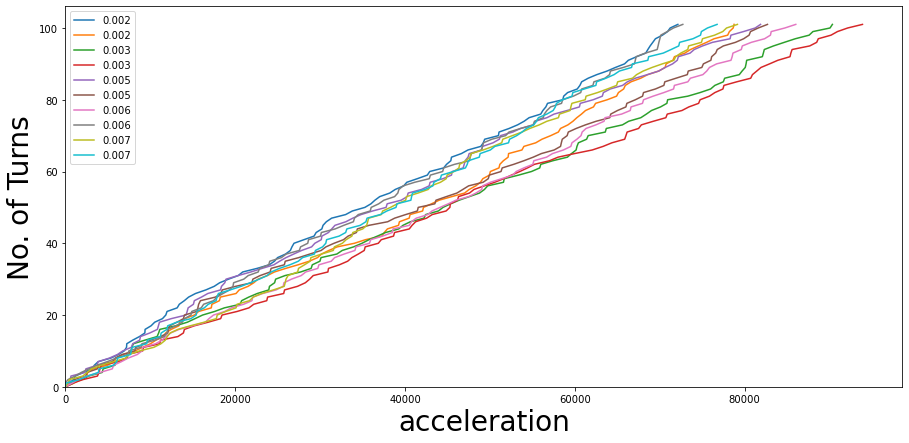

In [23]:
acceleration_analysis = generate_plot("acceleration_data.csv", "acceleration")

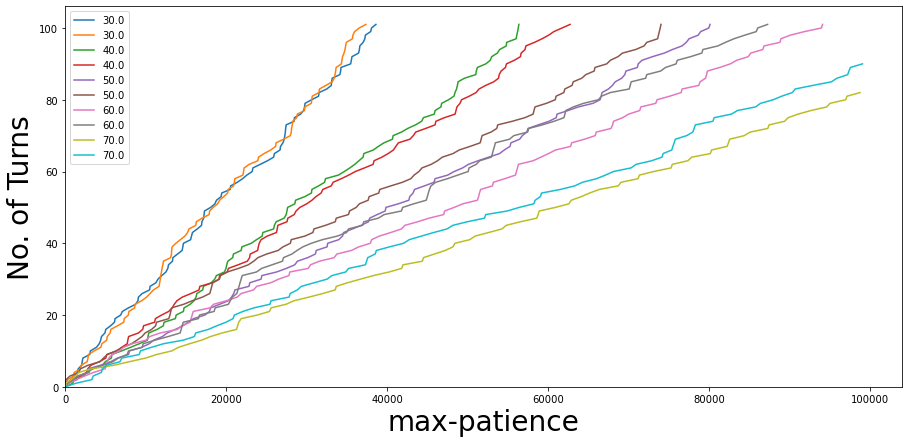

In [24]:
max_patience_analysis = generate_plot("max_patience_data.csv", "max-patience")

In [25]:
max_patience_analysis

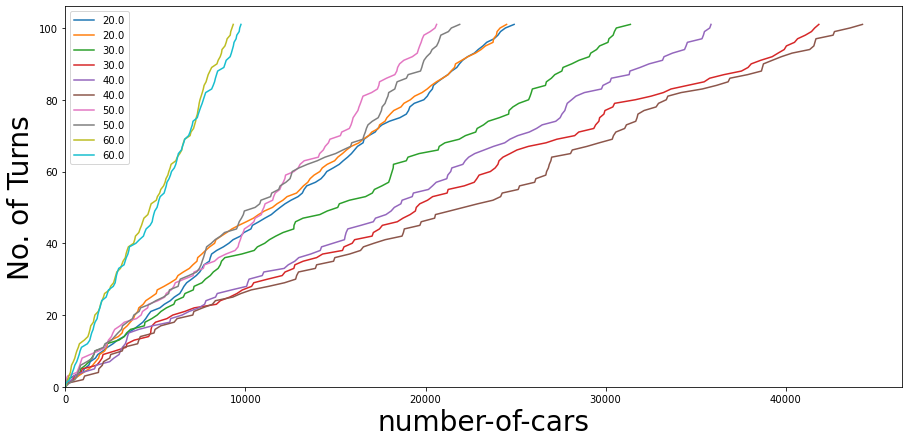

In [26]:
number_of_cars_analysis = generate_plot("number_of_cars_data.csv", "number-of-cars")

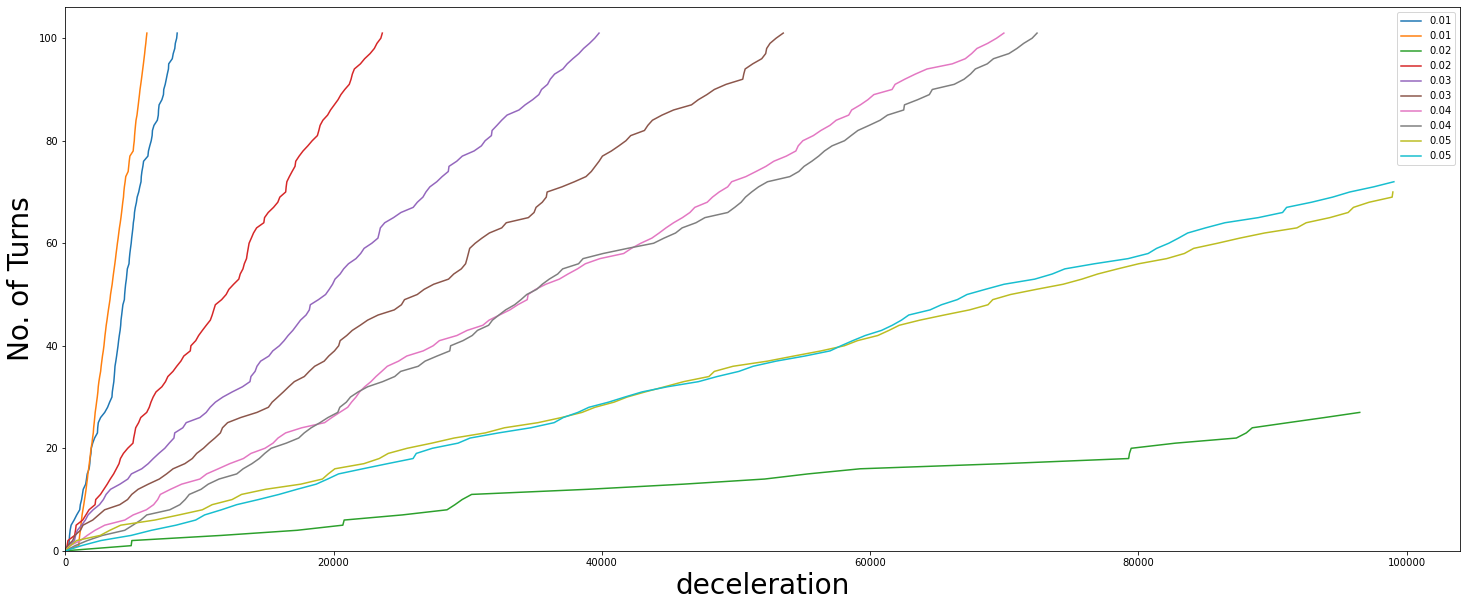

In [78]:
deceleration_analysis = generate_plot("deceleration_data.csv", "deceleration")